# <center> Curso Machine Learning e Imágenes en Python
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Colaboradores: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio



## Temario a desarrollar:
*	**Uso y herramientas básicas de Python**
*	**Imágenes digitales: tipos (binarias, monocromáticas y a color)**
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 


**Recomendación:**
+ Antes que nada **realice una copia de este archivo y trabaje en ella** 

**CLASE 4:** 
    
archivos necesarios para la notebook: 'lenna.jpg', 'daisy.jpg' y 'ortopantomografia2.png'
    
**Imágenes: Resolución, escala**

# 3 Conceptos y operaciones en imágenes

## 3.1 Resolución de una imagen
**Resolución** de la imagen: dada por la cantidad de píxeles (concepto simple, usual). 

Pero el concepto es más completo, existen otros tipos de Resolución: 

- **Resolución Espectral**: Dada por la cantidad de bandas o canales de la imagen (monocroma, RGB, hiperespectrales, etc)

- **Resolución Espacial**: Asociada a la cantidad de pixeles también pero también se considera la representación espacial de cada pixel en la escena que está representando (escala). A modo de ejemplo, en imágenes satelitales: Sentinel tiene algunas bandas con resolución de 10 metros, es decir cada pixel representa una porción del terreno de 10mx10m;  en imágenes microscópicas pueden ser en micrómetros, asociadas al aumento (5x,10x, etc.).

- **Resolución Radiométrica**: la cantidad de niveles de gris de cada banda, asociada al tipo de dato con que se guarda cada pixel o a la sensibilidad del sensor con que fue tomada la imagen.

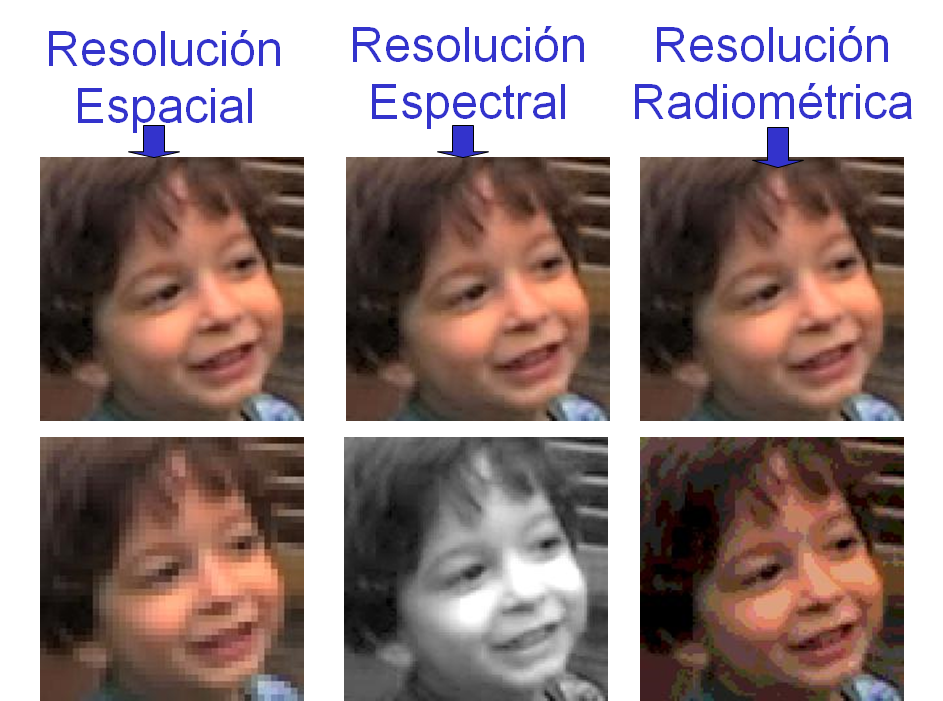

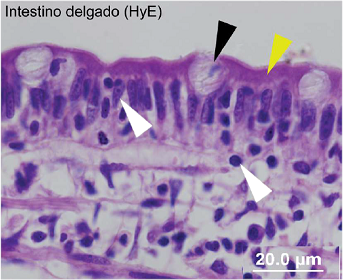

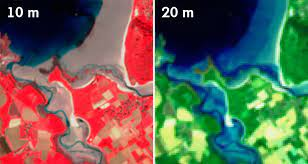

## 3.2  Transformaciones Espaciales Geométricas. Recortes



- Traslación 
- Rotación 
- Escala 

En todas estas transformaciones casi siempre necesitamos "interpolación" es decir decidir que valor de gris le asignamos a pixeles "nuevos"

https://commons.wikimedia.org/w/index.php?title=File%3AAffine_transformations.ogv







```
# E`sto tiene formato de código`
```

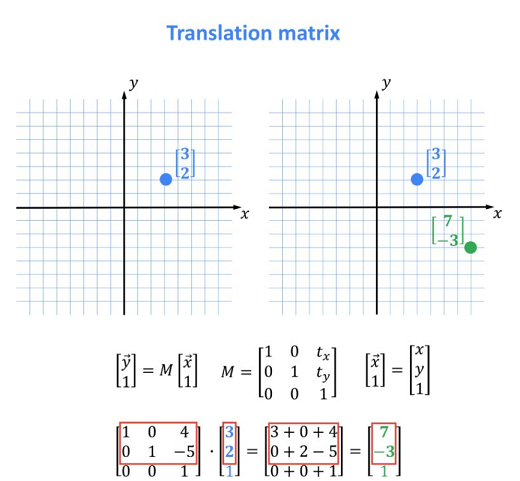

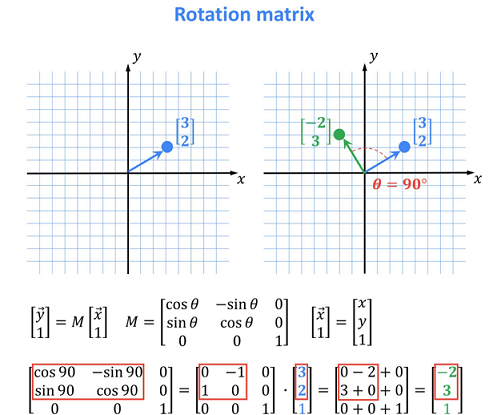

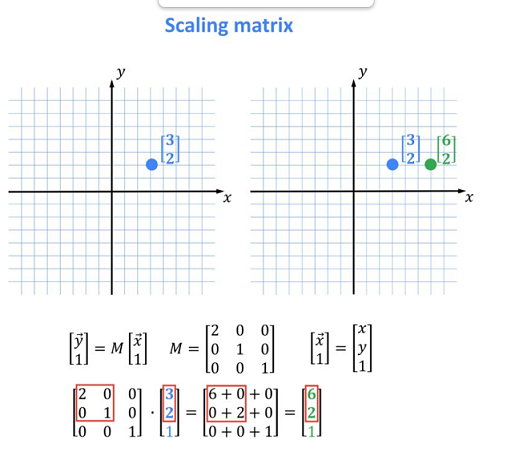



Se re-ubica el pixel de ubicación $(x,y)$ en nueva ubicación dada por los dos primeros lugares de
$ M . \begin{bmatrix}
x \\ 
y \\ 
1 
\end{bmatrix}$

**Cuidado con el cambio, ahora...**

x $\rightarrow$ columna 

y $\rightarrow$ fila

se intercambia la "intuición", porque primero se mueven las columnas y luego las filas.


$M=\begin{bmatrix}
1 & 0 & tx\\ 
0 & 1 & ty\\ 
0 & 0 & 1
\end{bmatrix} $ matriz para **traslación** 

$M=\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\ 
\sin(\theta) & \cos(\theta) & 0\\ 
0 & 0 & 1
\end{bmatrix} $  Matriz para **rotación**

$M=\begin{bmatrix}
\rho & 0 & 0\\ 
0 & \rho & 0\\ 
0 & 0 & 1
\end{bmatrix} $  o $M=\begin{bmatrix}
\rho_1 & 0 & 0\\ 
0 & \rho_2 & 0\\ 
0 & 0 & 1
\end{bmatrix} $ Matrices para **Escala**,

O bien se consideran sólo las dos primeras filas de M y se elimina la tercera (que es igual para todas). 

Se utilizan las matrices cuadradas para poder calcular la operación inversa.


## Librerías necesarias:

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
#from scipy import signal
from scipy.ndimage import rotate

ver, con cuidado... http://datahacker.rs/003-how-to-resize-translate-flip-and-rotate-an-image-with-opencv/

##RECORTE

### Ej. 1) 
Usando la imagen monocroma Ortopantomografia, Seleccionar un recorte
como imagen original, con nombre I1

Opcional:

Otra forma de visualizar imágenes usando Open CV (visualización de mejor calidad) 

- cv2.imshow en jupyter notebook (para l@s interesad@s:  abre una ventana extra, hay que cerrarla para seguir trabajando... investigar)
- cv2_imshow **en Colab**:


(267, 438, 3)



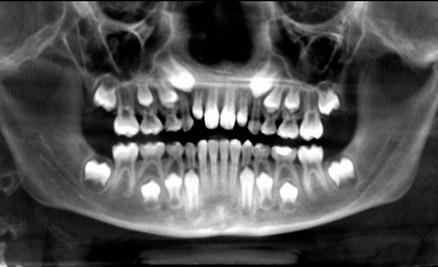

In [3]:
#Opcional para google colab para abrir la imagen
from google.colab.patches import cv2_imshow           #SI o SI tenemos que escribir este parche
ortopanto_BGR=cv2.imread('Ortopantomografia.jpg',1)   #con 1 al final, abre BGR
print(ortopanto_BGR.shape)
print()
cv2_imshow(ortopanto_BGR)

(267, 438) <class 'numpy.ndarray'>


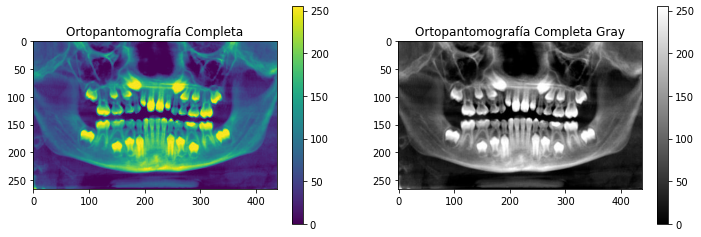

In [4]:
#Seguimos con el ejercicio 1)
#Usando la imagen monocroma Ortopantomografia, Seleccionar un recorte como imagen original, con nombre I1
ortopanto=cv2.imread('Ortopantomografia.jpg',0) #imagen monocroma desde archivo, 
print(ortopanto.shape,type(ortopanto))
#queda monocroma porque la abrimos con cv2.imread('imagen.extension',0)

plt.figure(figsize=(12,4))
plt.subplot(121),plt.imshow(ortopanto),plt.colorbar(), plt.title('Ortopantomografía Completa')
plt.subplot(122), plt.imshow(ortopanto,cmap='gray'),plt.colorbar(), plt.title('Ortopantomografía Completa Gray')
plt.show()

**Recorte:**

tamaño original: (267, 438) tamaño recorte: (176, 302)



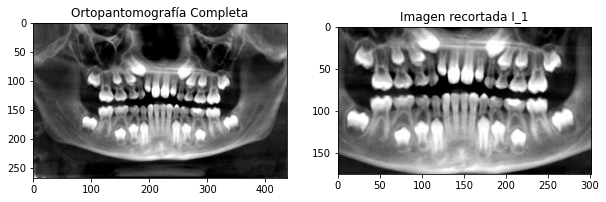

In [9]:
I1=ortopanto[60:236, 74:376]  # Un recorte de interés
print('tamaño original:',ortopanto.shape, 'tamaño recorte:',I1.shape)
print()

plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(ortopanto,cmap='gray'), plt.title('Ortopantomografía Completa')
plt.subplot(122), plt.imshow(I1,cmap='gray'), plt.title('Imagen recortada I_1')
plt.show()

## Traslación

$M=\begin{bmatrix}
1 & 0 & tx\\ 
0 & 1 & ty\\ 
0 & 0 & 1
\end{bmatrix} $ matriz para **traslación** 

### Ej. 2)
Considerando esta nueva imagen original: I_1 trasladarla de forma tal que el valor del pixel ubicado en [0,0] se traslade 132 pixeles hacia la derecha. (es decir a la posición [0 , 132] ojo!!!)

Considerando que la matriz para traslación es:

$M=\begin{bmatrix}
1 & 0 & tx\\ 
0 & 1 & ty
\end{bmatrix} $ matriz para **traslación** sin la última fila



height 176 width 302



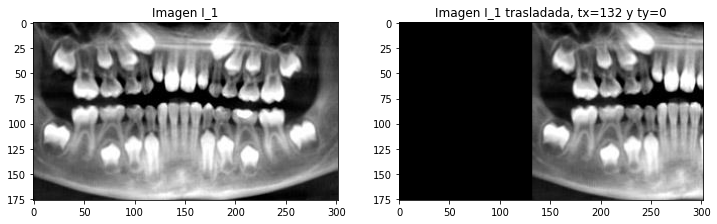


height_Tr 176 width_Tr 302


In [18]:
#info útil 

# Negative values of tx will shift the image to the left # Valores negativos de tx mueve la imagen a la izquierda
# Positive values will shift the image to the right
# Negative values of ty will shift the image up # Valores negativos de ty mueve la imagen arriba
# Positive values will shift the image down

height, width = I1.shape #alto (y, #filas) y ancho (x, #columnas)
print('height',height,'width', width)
print()

M = np.float32([[1, 0, 132], [0, 1, 0]])   #no hace falta colocar la última fila
translated = cv2.warpAffine(I1, M, (width, height)) # (ancho,alto) que quiero que tenga la nueva imagen, lo hago para que sea igual o no.

plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(translated,cmap='gray'), plt.title('Imagen I_1 trasladada, tx=132 y ty=0')
plt.show()
print()
# opcional cv2_imshow(translated)
height_Tr, width_Tr = translated.shape #alto (y, #filas) y ancho (x, #columnas)
print('height_Tr',height_Tr,'width_Tr', width_Tr)

height 176 width 302



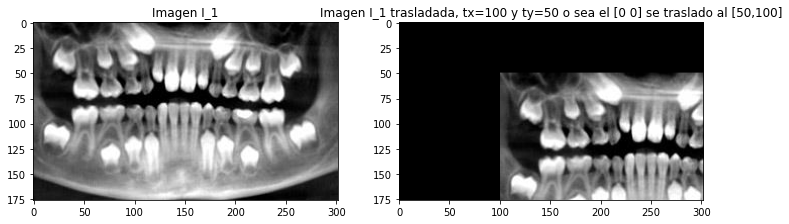

In [19]:
# y si ahora trasladamos en x (columnas) e y (filas)

height, width = I1.shape
print('height',height,'width', width)
print()

M = np.float32([[1, 0, 100], [0, 1, 50]])
translated = cv2.warpAffine(I1, M, (width, height))

plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(translated,cmap='gray'), plt.title('Imagen I_1 trasladada, tx=100 y ty=50 o sea el [0 0] se traslado al [50,100]')
plt.show()
# opcional: 
#cv2_imshow(translated)

dimensiones original height 176 width 302

Dimensiones trasladada sin perdida informacion height_Tr 226 width_Tr 402


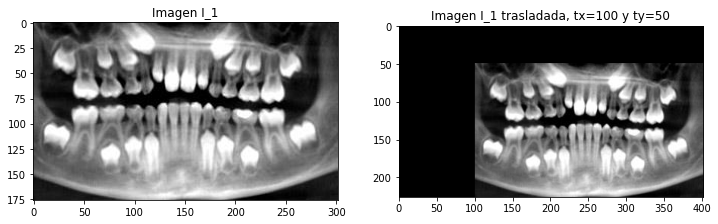

In [16]:
# trasladamos en x (columnas) e y (filas) pero sin perder información

tx=100
ty=50

M = np.float32([[1, 0, tx], [0, 1, ty]])
translated = cv2.warpAffine(I1, M, (width+tx, height+ty))
height, width = I1.shape #alto (y, #filas) y ancho (x, #columnas)
print('dimensiones original','height',height,'width', width)
print()

height_Tr, width_Tr = translated.shape #alto (y, #filas) y ancho (x, #columnas) de la matriz ya transladada
print('Dimensiones trasladada sin perdida informacion', 'height_Tr',height_Tr,'width_Tr', width_Tr)
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(translated,cmap='gray'), plt.title('Imagen I_1 trasladada, tx=100 y ty=50')
plt.show()
# para no perder parte de la imagen cuando la movemos, redimencionamos la nueva imagen, tiene más pixeles

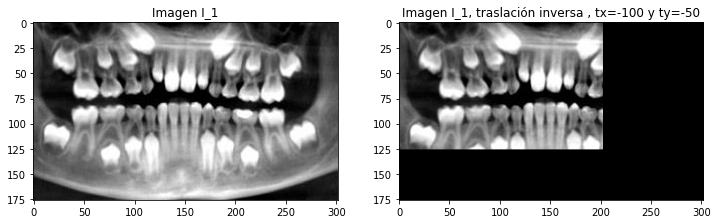

In [20]:
#Qué pasa si hacemos la traslación inversa? No se recupera la info perdida si no redefinimos el size de la nueva imagen

tx=-100
ty=-50

M = np.float32([[1, 0, tx], [0, 1, ty]])
translated_inv = cv2.warpAffine(translated, M, (width, height))

plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(translated_inv,cmap='gray'), plt.title('Imagen I_1, traslación inversa , tx=-100 y ty=-50')
plt.show()

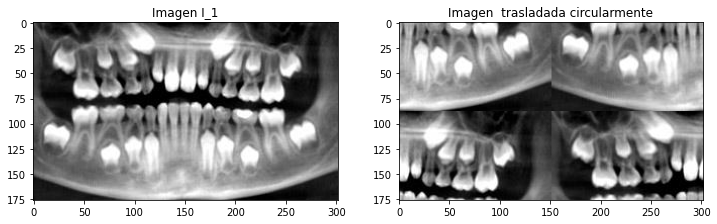

In [21]:
IGcirc=np.fft.fftshift(I1); #NOTAR fftshift SOLO TRASLADA (CIRCULARMENTE) los cuadrantes

plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(IGcirc,cmap='gray'), plt.title('Imagen  trasladada circularmente')
plt.show()

# Tarea 1 : cargar una imagen y realizarle las siguientes traslaciones
a) mover el pixel [0,0] al pixel [50 35] con perdida de información

b)idem sin pérdida de información

c) traslación circular


d) mostrar en una grilla 2x2 la imagen original y las 3 trasladadas

(512, 512, 3)



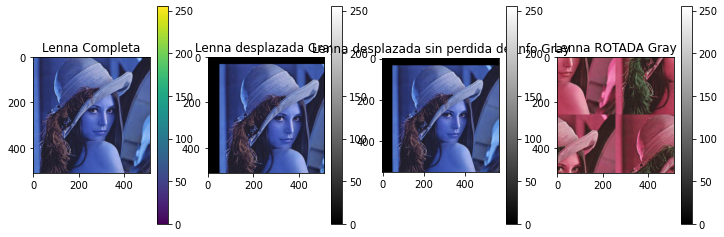

In [43]:
from google.colab.patches import cv2_imshow           #SI o SI tenemos que escribir este parche
lenna_BGR=cv2.imread('lenna.jpg',1)   #con 1 al final, abre BGR


print(lenna_BGR.shape)
print()
height, width,specrte = lenna_BGR.shape

#Una vez que tenemos las dimenciones armamos la matriz de translación
M = np.float32([[1, 0, 50], [0, 1, 35]])
translated = cv2.warpAffine(lenna_BGR, M, (width,height))

#Translacion sin perdida de info
x=50
y=35
translated2 = cv2.warpAffine(lenna_BGR, M, (width+x,height+y))

#Translacion circular
lenna_BGRcirc=np.fft.fftshift(lenna_BGR)


plt.figure(figsize=(12,4))
plt.subplot(141), plt.imshow(lenna_BGR),plt.colorbar(), plt.title('Lenna Completa')
plt.subplot(142), plt.imshow(translated,cmap='gray'),plt.colorbar(), plt.title('Lenna desplazada Gray')
plt.subplot(143), plt.imshow(translated2,cmap='gray'),plt.colorbar(), plt.title('Lenna desplazada sin perdida de info Gray')
plt.subplot(144), plt.imshow(lenna_BGRcirc,cmap='gray'),plt.colorbar(), plt.title('Lenna ROTADA Gray')
plt.show()

## Rotación



$M=\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\ 
\sin(\theta) & \cos(\theta) & 0\
\end{bmatrix} $  Matriz para **rotación** sin la última fila 

### Ej. 3) 
Realizar una rotación de 45 grados a I1

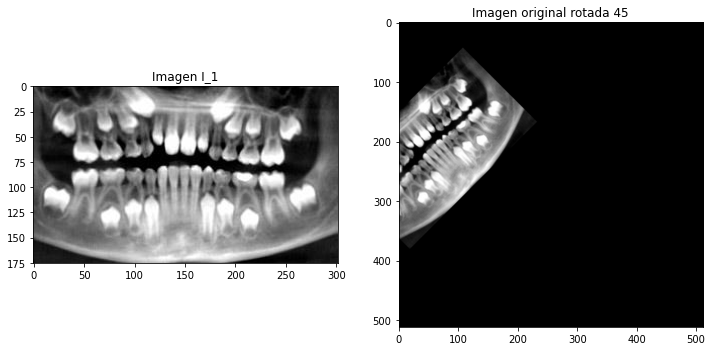

In [44]:
#Rotar la imagen original I1 manteniendo las dimensiones de la imagen.

M = cv2.getRotationMatrix2D((width/2,height/2),45,1) #centro angulo y escala 
#Los parámetros width/2,height/2, indican que la rotación se haga desde el centro
I1r45D = cv2.warpAffine(I1,M,(width,height))

#I1r45D=rotate(I1,45,reshape=False) #otra opcion con rotate de la libreria scipy

plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(I1r45D,cmap='gray'), plt.title('Imagen original rotada 45')
plt.show()

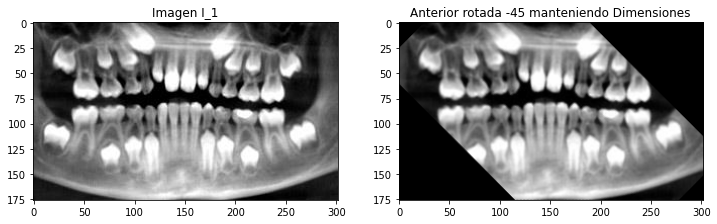

In [ ]:
#Rotar la resultante -45 grados manteniendo dimensiones

M = cv2.getRotationMatrix2D((width/2,height/2),-45,1) 
I1r45Dinv = cv2.warpAffine(I1r45D,M,(width,height))

#I1r45Dinv=rotate(I1r45D,-45,reshape=False)  #otra forma de haderlo

plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(I1r45Dinv,cmap='gray'), plt.title('Anterior rotada -45 manteniendo Dimensiones')
plt.show()

#¿Se puede recuperar la imagen orignial?

dimensiones original (176, 302)
dimensiones rotada manteniendo dimensiones de la original (338, 338)


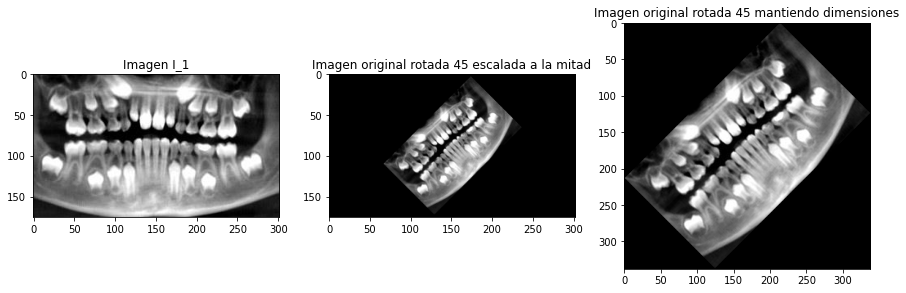

In [ ]:
#Qué pasa si no mantenemos las mismas dimensiones? y si mantenemos pero cambiamos de escala la imagen?

M = cv2.getRotationMatrix2D((width/2,height/2),45,0.5) #Los parámetros width/2,height/2, indican que la rotación se haga desde el centro
I1r45 = cv2.warpAffine(I1,M,(width,height))
I1r45dim = rotate(I1,45) #Se mantienen las mismas dimensiones de la imagen original. La función rotate es de la librería scipy

print('dimensiones original',I1r45.shape)
print('dimensiones rotada manteniendo dimensiones de la original',I1r45dim.shape)

plt.figure(figsize=(15,12))
plt.subplot(131),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(132),plt.imshow(I1r45,cmap='gray'), plt.title('Imagen original rotada 45 escalada a la mitad')
plt.subplot(133),plt.imshow(I1r45dim,cmap='gray'), plt.title('Imagen original rotada 45 mantiendo dimensiones')
plt.show()

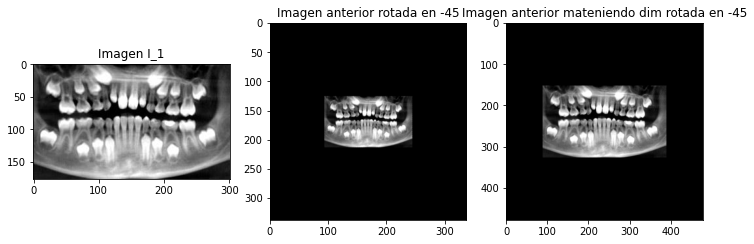

In [ ]:
#Si la rotamos -45 grados, recuperamos la original?

M = cv2.getRotationMatrix2D((width/2,height/2),-45,1) 
#I1r45inv = cv2.warpAffine(I1r45,M,(width,height))
I1r45inv = rotate(I1r45,-45)
I1r45diminv = rotate(I1r45dim,-45)

plt.figure(figsize=(12,10))
plt.subplot(131),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(132),plt.imshow(I1r45inv,cmap='gray'), plt.title('Imagen anterior rotada en -45')
plt.subplot(133),plt.imshow(I1r45diminv,cmap='gray'), plt.title('Imagen anterior mateniendo dim rotada en -45')
plt.show()

#Tarea 2
Cargar una imagen RGB en tono de grises y realizarle las siguientes rotaciones:

a) la imagen  output de la rotacion tiene el mismo tamaño que la imagen input

b) la imagen rotada mantiene sus dimensiones

c) rotar a 60° y escalar con factor de 0.75

d) mostrar en una grilla 2x2 la imagen original y las 3 rotadas

## Escala

$M=\begin{bmatrix}
\rho & 0 & 0\\ 
0 & \rho & 0\\ 
0 & 0 & 1
\end{bmatrix} $  o $M=\begin{bmatrix}
\rho_1 & 0 & 0\\ 
0 & \rho_2 & 0\\ 
0 & 0 & 1
\end{bmatrix} $ Matrices para **Escala**,

### Ej. 4) 
Duplicar el tamaño de la imagen original

height 176 width 302 Imagen original
(176, 302)
height 352 width 604 Imagen resized
(352, 604)


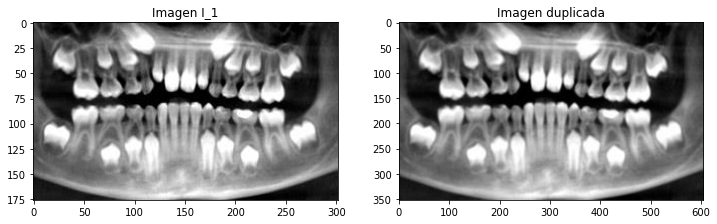

In [ ]:
height, width = I1.shape
print('height',height,'width', width,'Imagen original')
print(I1.shape)
p1=2
p2=2

resized = cv2.resize(I1, (width*p1,height*p2))

height1, width1 = resized.shape
print('height',height1,'width', width1,'Imagen resized')
print(resized.shape)
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(resized,cmap='gray'), plt.title('Imagen duplicada')
plt.show()

##También podemos pedir un tamaño de la imagen transformada , por ejemplo de 120x120

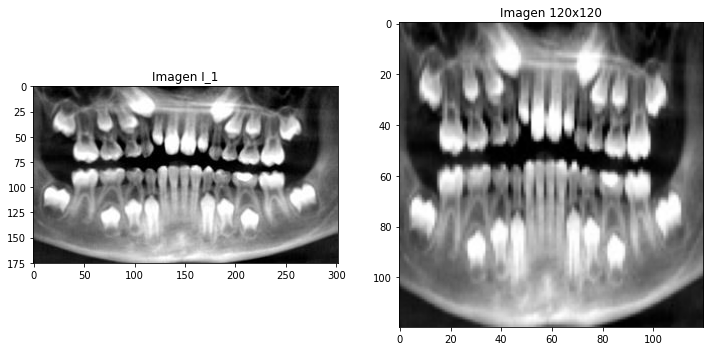

In [ ]:
resized2 = cv2.resize(I1, (120,120))
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(resized2,cmap='gray'), plt.title('Imagen 120x120')
plt.show()

¿que paso? que la relación o la proporción entre filas y columnas (radio filas y radio columnas) no se respeta

(176, 302)
(205, 120)
dimensiones del resize (120, 205)


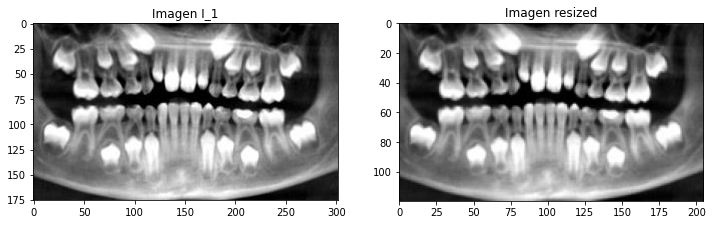

In [ ]:
#Si solo me dan una sola dimensión como información para hacer el resize
#Hacer resize a 120 filas 

h, w = I1.shape
print(I1.shape)

ratio = 120 / h #ratio  para hacer el cambio de escala en columnas

# Dimensions of a resized image
dim = (int(w * ratio),120) #con w*ratio hacemos cambio de escala en columnas 
print(dim)
resized_2 = cv2.resize(I1, dim)
print('dimensiones del resize',resized_2.shape)
#print(dim)
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(I1,cmap='gray'), plt.title('Imagen I_1')
plt.subplot(122),plt.imshow(resized_2,cmap='gray'), plt.title('Imagen resized')
plt.show()


# Tarea 3 
Cargar una imagen, recortarla de modo rectangular y al recorte realizarle:

a) un cambio de escala verticalmente

b) un cambio de escala horizontalmente

c) un cambio de escala con el mismo radio en ambas direcciones

d) mostrar en una grilla 2x2 la imagen recortada y las 3 escaladas


### Ejer 5)

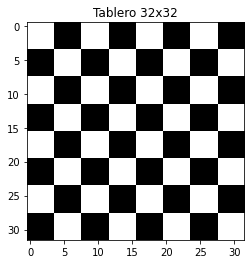

In [ ]:
# Método de interpolación
# Genere la Imagen Tablero (un auténtico tablero de ajedréz de tamaño 32x32)

B=np.ones((4,4))
N=np.zeros((4,4))

BN = np.concatenate((B,N,B,N,B,N,B,N),axis=1)
NB = np.concatenate((N,B,N,B,N,B,N,B),axis=1)

Tablero = np.concatenate((BN,NB,BN,NB,BN,NB,BN,NB),axis=0)

plt.imshow(Tablero,cmap='gray'), plt.title('Tablero 32x32')
plt.show()

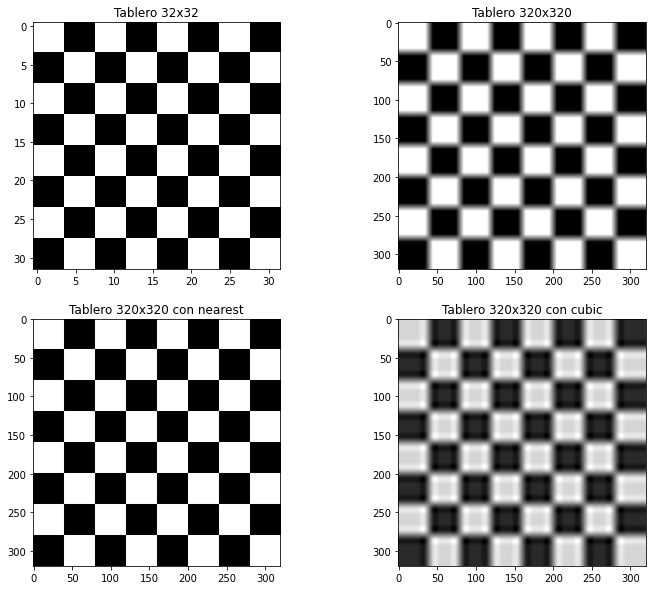

In [ ]:
#Utilice el tablero 32x32 para crear un Tablero de 320x320

h, w = Tablero.shape
p1=p2=10

Tablero320=cv2.resize(Tablero,(w*p1,h*p2))
Tablero320_nearest=cv2.resize(Tablero,(w*p1,h*p2),interpolation = cv2.INTER_NEAREST)#usa INTER_LINEAR por defecto
Tablero320_cubic=cv2.resize(Tablero,(w*p1,h*p2),interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(12,10))
plt.subplot(221),plt.imshow(Tablero,cmap='gray'), plt.title('Tablero 32x32')
plt.subplot(222),plt.imshow(Tablero320,cmap='gray'), plt.title('Tablero 320x320')
plt.subplot(223),plt.imshow(Tablero320_nearest,cmap='gray'), plt.title('Tablero 320x320 con nearest')
plt.subplot(224),plt.imshow(Tablero320_cubic,cmap='gray'), plt.title('Tablero 320x320 con cubic')
plt.show()

#### Escalado con OpenCV fijando interpolación cúbica (considera 16 vecinos)

#4 OPCIONAL 

##4.1 Funciones definidas en librería PIL
## Recorte. Rotación.Cambio de tamaño.

**Rotación: Observación**
La rotación con respecto al origen de coordenadas está dada por:

![image.png](attachment:image.png)

Se requiere conocer el ángulo a rotar y el centro de la rotación.

Si el ángulo rotado no es múltiplo de 90 grados, la imagen resulta recortada. Es necesario hacer alguna interpolación.


In [ ]:
import PIL
from PIL import Image

path="lenna.jpg" #Utilicemos una imagen en que se vea bien la rotación
ima=Image.open(path) #tipo imagen


recorte=(100,100,300,300) #Fijamos esquinas superior izquierda y derecha

imagenrecortada=ima.crop(recorte)

imagenrotada=ima.rotate(45) #Se indica el ángulo girado en grados. Giro antihorario

imagenachicada=ima.resize((100,100))

imagenrecortada.show()
imagenrotada.show()
imagenachicada.show()
